In [5]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

     ---------------------------------------- 7.2/7.2 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 982.0 kB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 kB 3.2 MB/s eta 0:00:00


In [6]:
df=pd.read_csv("ADANIPORTS.csv")

In [173]:
df.shape

(3322, 14)

In [7]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [174]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,3514692,0.2789


In [8]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [9]:
df.drop("Trades",axis=1,inplace=True)

In [47]:
df1=df.reset_index()["High"]
df1.shape

(3322,)

In [48]:
df1

0       1050.00
1        990.00
2        914.75
3        958.00
4        995.00
         ...   
3317     739.65
3318     757.50
3319     760.00
3320     765.85
3321     759.45
Name: High, Length: 3322, dtype: float64

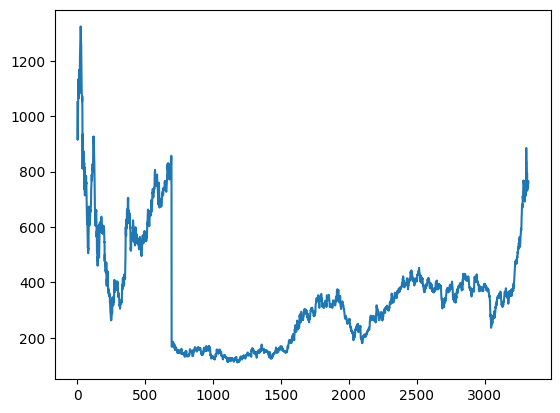

In [49]:
plt.plot(df1)

# #Scaling the data

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [51]:
df1

array([[0.77421614],
       [0.72477442],
       [0.66276626],
       ...,
       [0.53524783],
       [0.54006839],
       [0.53479461]])

# #Splitting dataset into train_data, test_data

In [52]:
train_size=int(len(df1)*0.85)
test_size=len(df1)-train_size
train_data, test_data= df1[0:train_size,:], df1[train_size:len(df1),:]

In [53]:
train_size,test_size, len(train_data), len(test_data)

(2823, 499, 2823, 499)

# Converting an array of values into a dataset matrix

In [117]:

def create_dataset(dataset, time_step=1):
    datax, datay = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]      ###i=0, 0,1,2,3-----99   100 
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return numpy.array(datax), numpy.array(datay)

## Reshaping into x=t, t+1, t+2, t+3 and y=t+4

In [118]:
time_step= 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [119]:
print(x_train)

[[0.77421614 0.72477442 0.66276626 ... 0.44868361 0.46388694 0.46759507]
 [0.72477442 0.66276626 0.6984055  ... 0.46388694 0.46759507 0.46755387]
 [0.66276626 0.6984055  0.72889457 ... 0.46759507 0.46755387 0.50063862]
 ...
 [0.21461827 0.21420625 0.21634873 ... 0.22788513 0.22953319 0.2357546 ]
 [0.21420625 0.21634873 0.21305261 ... 0.22953319 0.2357546  0.23488937]
 [0.21634873 0.21305261 0.21498908 ... 0.2357546  0.23488937 0.23184047]]


In [120]:
print(y_train)

[0.46755387 0.50063862 0.51967368 ... 0.23488937 0.23184047 0.23175807]


In [121]:
print(x_test)

[[0.2327469  0.23340612 0.23361213 ... 0.21247579 0.21099254 0.22607227]
 [0.23340612 0.23361213 0.23612542 ... 0.21099254 0.22607227 0.25301801]
 [0.23361213 0.23612542 0.23727906 ... 0.22607227 0.25301801 0.25301801]
 ...
 [0.24930988 0.25178196 0.26002225 ... 0.52280499 0.52445305 0.51847884]
 [0.25178196 0.26002225 0.27320671 ... 0.52445305 0.51847884 0.53318775]
 [0.26002225 0.27320671 0.27526678 ... 0.51847884 0.53318775 0.53524783]]


In [123]:
print(x_train.shape),print(y_train.shape)

(2722, 100)
(2722,)


(None, None)

In [124]:
print(x_test.shape),print(y_test.shape)

(398, 100)
(398,)


(None, None)

# #Reshaping from 2d array to 3d array

In [126]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [128]:
print(x_train)

[[[0.77421614]
  [0.72477442]
  [0.66276626]
  ...
  [0.44868361]
  [0.46388694]
  [0.46759507]]

 [[0.72477442]
  [0.66276626]
  [0.6984055 ]
  ...
  [0.46388694]
  [0.46759507]
  [0.46755387]]

 [[0.66276626]
  [0.6984055 ]
  [0.72889457]
  ...
  [0.46759507]
  [0.46755387]
  [0.50063862]]

 ...

 [[0.21461827]
  [0.21420625]
  [0.21634873]
  ...
  [0.22788513]
  [0.22953319]
  [0.2357546 ]]

 [[0.21420625]
  [0.21634873]
  [0.21305261]
  ...
  [0.22953319]
  [0.2357546 ]
  [0.23488937]]

 [[0.21634873]
  [0.21305261]
  [0.21498908]
  ...
  [0.2357546 ]
  [0.23488937]
  [0.23184047]]]


## Creating stack LSTM model

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [134]:
model=Sequential()
#input layer
model.add(LSTM(50, return_sequences=True, input_shape=(100,1))) #5star x_train.shape[1],1 from reshape 2d to 3d or time_step=100
#1st hidden layer
model.add(LSTM(50, return_sequences=True))
#2nd hidden layer
model.add(LSTM(50))
#output layer
model.add(Dense(1))
#Compiling
model.compile(optimizer="adam",loss="mean_squared_error")

In [135]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [137]:
#fitting
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
43/43 [==============================] - 36s 592ms/step - loss: 0.0065 - val_loss: 0.0012
Epoch 2/100
43/43 [==============================] - 17s 394ms/step - loss: 0.0013 - val_loss: 9.1878e-04
Epoch 3/100
43/43 [==============================] - 20s 472ms/step - loss: 0.0011 - val_loss: 5.5375e-04
Epoch 4/100
43/43 [==============================] - 21s 483ms/step - loss: 9.2638e-04 - val_loss: 0.0013
Epoch 5/100
43/43 [==============================] - 17s 404ms/step - loss: 9.2763e-04 - val_loss: 5.0806e-04
Epoch 6/100
43/43 [==============================] - 15s 343ms/step - loss: 8.1251e-04 - val_loss: 5.8540e-04
Epoch 7/100
43/43 [==============================] - 15s 361ms/step - loss: 8.6139e-04 - val_loss: 7.5863e-04
Epoch 8/100
43/43 [==============================] - 17s 403ms/step - loss: 7.9842e-04 - val_loss: 0.0011
Epoch 9/100
43/43 [==============================] - 20s 458ms/step - loss: 7.4478e-04 - val_loss: 7.1712e-04
Epoch 10/100
43/43 [==============

43/43 [==============================] - 21s 481ms/step - loss: 2.0040e-04 - val_loss: 1.2861e-04
Epoch 76/100
43/43 [==============================] - 21s 488ms/step - loss: 1.9489e-04 - val_loss: 1.2550e-04
Epoch 77/100
43/43 [==============================] - 18s 413ms/step - loss: 1.9783e-04 - val_loss: 1.2164e-04
Epoch 78/100
43/43 [==============================] - 20s 465ms/step - loss: 2.0642e-04 - val_loss: 1.4079e-04
Epoch 79/100
43/43 [==============================] - 20s 463ms/step - loss: 1.8838e-04 - val_loss: 1.1654e-04
Epoch 80/100
43/43 [==============================] - 20s 476ms/step - loss: 1.8915e-04 - val_loss: 1.1744e-04
Epoch 81/100
43/43 [==============================] - 23s 533ms/step - loss: 2.0887e-04 - val_loss: 1.2896e-04
Epoch 82/100
43/43 [==============================] - 22s 515ms/step - loss: 2.2750e-04 - val_loss: 1.1266e-04
Epoch 83/100
43/43 [==============================] - 16s 368ms/step - loss: 1.9251e-04 - val_loss: 1.1634e-04
Epoch 84/100
4

In [145]:
np.__version__

'1.23.5'

In [146]:
#Predictions
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [147]:
#Transforming back to original form.
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [148]:
#Calculating RMSE for train and test
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

364.0411438856868
437.50025939877


# Plotting

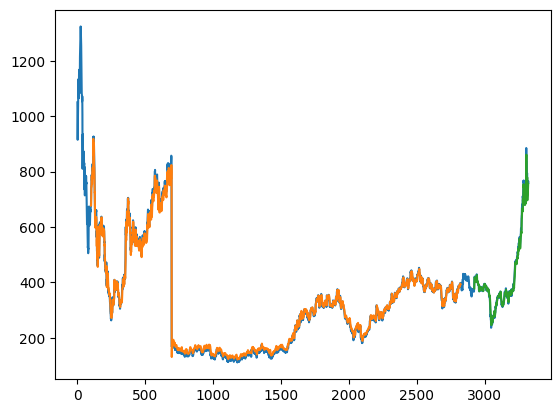

In [149]:
#shift train predictions for plotting
look_back=100 #time_step=100
trainpredictplot= np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testpredictplot= np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In the above diagram blue=total data, orange= train data, green= test data

# Future prediction

In [151]:
len(test_data)

499

In [157]:
x_input=test_data[399:].reshape(1,-1)
x_input.shape

(1, 100)

In [158]:
#coverting the 100 rows of array to 100 values of list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [162]:
print(temp_input) #100 values in a list

[0.27526677928391907, 0.28663837501545053, 0.30031725104033624, 0.30015244530509666, 0.2961971076593465, 0.2996580280993779, 0.300399653907956, 0.29829838078365123, 0.3042313872522764, 0.3048906101932347, 0.30353096287750814, 0.29871039512175024, 0.2938074244983725, 0.29669152486506534, 0.3018005026574925, 0.3069094804499196, 0.31519096864570884, 0.31263647974949527, 0.31078241522804995, 0.31341930699188336, 0.3275926002224877, 0.3299822833834617, 0.324708499855795, 0.32507931276008406, 0.3382225701454411, 0.34353755510691775, 0.33954101602735776, 0.3380165629763916, 0.35396151786082153, 0.35598038811750654, 0.35478554653701955, 0.3476164970540975, 0.3498413744798319, 0.37250216307527506, 0.3719665444357464, 0.3683820196942854, 0.3601005314984962, 0.3506654031560298, 0.3440319723126365, 0.3482757199950558, 0.3584524741461004, 0.3661983437023608, 0.37233735734003537, 0.3814840756458324, 0.38193729141774135, 0.3984590663755099, 0.39499814593547855, 0.3926908656421244, 0.39821185777265056

In [164]:
#demonstrating prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=1)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1, n_steps, 1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.52639407]
101
1 day input [0.28663838 0.30031725 0.30015245 0.29619711 0.29965803 0.30039965
 0.29829838 0.30423139 0.30489061 0.30353096 0.2987104  0.29380742
 0.29669152 0.3018005  0.30690948 0.31519097 0.31263648 0.31078242
 0.31341931 0.3275926  0.32998228 0.3247085  0.32507931 0.33822257
 0.34353756 0.33954102 0.33801656 0.35396152 0.35598039 0.35478555
 0.3476165  0.34984137 0.37250216 0.37196654 0.36838202 0.36010053
 0.3506654  0.34403197 0.34827572 0.35845247 0.36619834 0.37233736
 0.38148408 0.38193729 0.39845907 0.39499815 0.39269087 0.39821186
 0.42124346 0.43628198 0.43924849 0.46108525 0.46108525 0.46656504
 0.46808949 0.47155041 0.46190927 0.49515883 0.488649   0.48963784
 0.50615961 0.53108648 0.53994479 0.53607186 0.54167525 0.53475341
 0.5345062  0.528738   0.5087141  0.51522393 0.49977339 0.49033826
 0.47880186 0.50743686 0.53112768 0.52741955 0.49598286 0.49462321
 0.50063862 0.50220428 0.52041531 0.5228874  0.61163528 0.63825141
 0.59952206 0.59869803 0.57636686

1/1 [==============================] - 0s 75ms/step
7 day output [[0.44294277]]
8 day input [0.30423139 0.30489061 0.30353096 0.2987104  0.29380742 0.29669152
 0.3018005  0.30690948 0.31519097 0.31263648 0.31078242 0.31341931
 0.3275926  0.32998228 0.3247085  0.32507931 0.33822257 0.34353756
 0.33954102 0.33801656 0.35396152 0.35598039 0.35478555 0.3476165
 0.34984137 0.37250216 0.37196654 0.36838202 0.36010053 0.3506654
 0.34403197 0.34827572 0.35845247 0.36619834 0.37233736 0.38148408
 0.38193729 0.39845907 0.39499815 0.39269087 0.39821186 0.42124346
 0.43628198 0.43924849 0.46108525 0.46108525 0.46656504 0.46808949
 0.47155041 0.46190927 0.49515883 0.488649   0.48963784 0.50615961
 0.53108648 0.53994479 0.53607186 0.54167525 0.53475341 0.5345062
 0.528738   0.5087141  0.51522393 0.49977339 0.49033826 0.47880186
 0.50743686 0.53112768 0.52741955 0.49598286 0.49462321 0.50063862
 0.50220428 0.52041531 0.5228874  0.61163528 0.63825141 0.59952206
 0.59869803 0.57636686 0.5317457  0.5307

1/1 [==============================] - 0s 72ms/step
14 day output [[0.35600802]]
15 day input [0.30690948 0.31519097 0.31263648 0.31078242 0.31341931 0.3275926
 0.32998228 0.3247085  0.32507931 0.33822257 0.34353756 0.33954102
 0.33801656 0.35396152 0.35598039 0.35478555 0.3476165  0.34984137
 0.37250216 0.37196654 0.36838202 0.36010053 0.3506654  0.34403197
 0.34827572 0.35845247 0.36619834 0.37233736 0.38148408 0.38193729
 0.39845907 0.39499815 0.39269087 0.39821186 0.42124346 0.43628198
 0.43924849 0.46108525 0.46108525 0.46656504 0.46808949 0.47155041
 0.46190927 0.49515883 0.488649   0.48963784 0.50615961 0.53108648
 0.53994479 0.53607186 0.54167525 0.53475341 0.5345062  0.528738
 0.5087141  0.51522393 0.49977339 0.49033826 0.47880186 0.50743686
 0.53112768 0.52741955 0.49598286 0.49462321 0.50063862 0.50220428
 0.52041531 0.5228874  0.61163528 0.63825141 0.59952206 0.59869803
 0.57636686 0.5317457  0.53071567 0.56396523 0.51126859 0.52362902
 0.52280499 0.52445305 0.51847884 0.53

1/1 [==============================] - 0s 49ms/step
21 day output [[0.30491516]]
22 day input [0.3247085  0.32507931 0.33822257 0.34353756 0.33954102 0.33801656
 0.35396152 0.35598039 0.35478555 0.3476165  0.34984137 0.37250216
 0.37196654 0.36838202 0.36010053 0.3506654  0.34403197 0.34827572
 0.35845247 0.36619834 0.37233736 0.38148408 0.38193729 0.39845907
 0.39499815 0.39269087 0.39821186 0.42124346 0.43628198 0.43924849
 0.46108525 0.46108525 0.46656504 0.46808949 0.47155041 0.46190927
 0.49515883 0.488649   0.48963784 0.50615961 0.53108648 0.53994479
 0.53607186 0.54167525 0.53475341 0.5345062  0.528738   0.5087141
 0.51522393 0.49977339 0.49033826 0.47880186 0.50743686 0.53112768
 0.52741955 0.49598286 0.49462321 0.50063862 0.50220428 0.52041531
 0.5228874  0.61163528 0.63825141 0.59952206 0.59869803 0.57636686
 0.5317457  0.53071567 0.56396523 0.51126859 0.52362902 0.52280499
 0.52445305 0.51847884 0.53318775 0.53524783 0.54006839 0.53479461
 0.52639407 0.51600569 0.5051958  0.

1/1 [==============================] - 0s 45ms/step
28 day output [[0.27795067]]
29 day input [0.35598039 0.35478555 0.3476165  0.34984137 0.37250216 0.37196654
 0.36838202 0.36010053 0.3506654  0.34403197 0.34827572 0.35845247
 0.36619834 0.37233736 0.38148408 0.38193729 0.39845907 0.39499815
 0.39269087 0.39821186 0.42124346 0.43628198 0.43924849 0.46108525
 0.46108525 0.46656504 0.46808949 0.47155041 0.46190927 0.49515883
 0.488649   0.48963784 0.50615961 0.53108648 0.53994479 0.53607186
 0.54167525 0.53475341 0.5345062  0.528738   0.5087141  0.51522393
 0.49977339 0.49033826 0.47880186 0.50743686 0.53112768 0.52741955
 0.49598286 0.49462321 0.50063862 0.50220428 0.52041531 0.5228874
 0.61163528 0.63825141 0.59952206 0.59869803 0.57636686 0.5317457
 0.53071567 0.56396523 0.51126859 0.52362902 0.52280499 0.52445305
 0.51847884 0.53318775 0.53524783 0.54006839 0.53479461 0.52639407
 0.51600569 0.5051958  0.4942084  0.48269868 0.47030863 0.45697179
 0.44294277 0.42866492 0.41460517 0.4

In [166]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [167]:
len(df1)

3322

In [168]:
df3=df1.tolist()
df3.extend(lst_output)

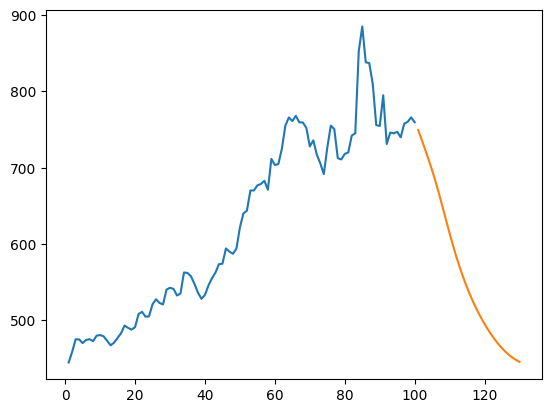

In [172]:
plt.plot(day_new,scaler.inverse_transform(df1[3222:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))